# Homework 5: Data Visualization
## Kaushik Raman

### Q1: Load the file into your workspace using pandas. Call the dataframe expvalues.

In [2]:
#load the library
import pandas as pd 
#load the file
expvalues = pd.read_table("/Users/kaushikraman/NYUcoursework/Sem3/python/Homework05/DESeq2_results.txt", sep=" ")

In [4]:
expvalues

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1,81.112933,0.037688,0.120521,0.312711,7.545000e-01,8.366486e-01
503538,50.669167,0.033078,0.108786,0.304060,7.610822e-01,8.413241e-01
144571,97.279333,-0.465952,0.325407,-1.431904,1.521712e-01,2.746420e-01
8086,125.240478,0.184769,0.135713,1.361466,1.733666e-01,3.012296e-01
65985,166.579770,-0.155675,0.055753,-2.792207,5.234983e-03,2.207113e-02
...,...,...,...,...,...,...
79364,1281.404158,-0.211682,0.079087,-2.676550,7.438439e-03,2.889633e-02
79699,2588.919120,-0.326052,0.097394,-3.347754,8.146919e-04,4.970515e-03
7791,1286.975330,-0.956406,0.157390,-6.076663,1.227089e-09,9.319891e-08
23140,2790.243793,-0.391112,0.117910,-3.317039,9.097697e-04,5.438600e-03


### Q2: Using either seaborn or matplotlib, create a histogram of log2foldchange.

<AxesSubplot:xlabel='log2FoldChange', ylabel='Count'>

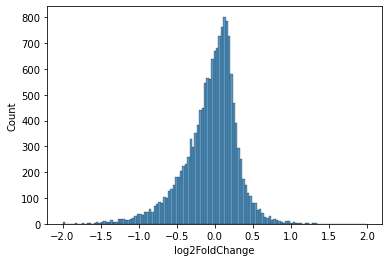

In [7]:
import seaborn as sns
sns.histplot(data = expvalues, x="log2FoldChange", binrange=[-2,2])

In [24]:
expvalues.dtypes

baseMean          float64
log2FoldChange    float64
lfcSE             float64
stat              float64
pvalue            float64
padj              float64
dtype: object

### Q3: Determining the which genes (rows) that satisfy the conditions:
(log2foldchange > 1 or log2foldchange < -1) and padj < 0.05
Create a new column, called sig, in expvalues that labels all the genes that satisfy the
condition above as “significant” and those that do not as “notsignificant”

In [49]:
expvalues['sig'] = expvalues.apply(lambda row: 'significant' if abs(row.log2FoldChange) > 1 and row.padj < 0.05 else 'notsignificant', axis=1)

In [50]:
expvalues

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,sig
1,81.112933,0.037688,0.120521,0.312711,7.545000e-01,8.366486e-01,notsignificant
503538,50.669167,0.033078,0.108786,0.304060,7.610822e-01,8.413241e-01,notsignificant
144571,97.279333,-0.465952,0.325407,-1.431904,1.521712e-01,2.746420e-01,notsignificant
8086,125.240478,0.184769,0.135713,1.361466,1.733666e-01,3.012296e-01,notsignificant
65985,166.579770,-0.155675,0.055753,-2.792207,5.234983e-03,2.207113e-02,notsignificant
...,...,...,...,...,...,...,...
79364,1281.404158,-0.211682,0.079087,-2.676550,7.438439e-03,2.889633e-02,notsignificant
79699,2588.919120,-0.326052,0.097394,-3.347754,8.146919e-04,4.970515e-03,notsignificant
7791,1286.975330,-0.956406,0.157390,-6.076663,1.227089e-09,9.319891e-08,notsignificant
23140,2790.243793,-0.391112,0.117910,-3.317039,9.097697e-04,5.438600e-03,notsignificant


### Q4: Using either seaborn or matplotlib, create a scatter plot 
where the x-axis is the log2foldchange and the y-axis is the -log10(adjpvalue). Color the significant points red and the notsignificant genes yellow.

In [58]:
adjpvalue = expvalues['padj']

In [65]:
import numpy
y = -numpy.log(adjpvalue)


<AxesSubplot:xlabel='log2FoldChange', ylabel='padj'>

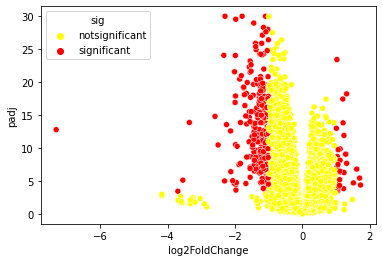

In [68]:
sns.scatterplot(data=expvalues, x = 'log2FoldChange', y = y, hue = 'sig', palette=('yellow','red'))